In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
#import seaborn as sns

In [93]:
def hamil(m,c,x,y,p1,p2,points):
    s=0 
    for i in range(points):
        s = s + np.square(y[i]-m*x[i]-c)   
    p1 = p1*p1
    p2 = p2*p2
    s = s+p1+p2
    return np.exp(-s/2)

In [94]:
#Defining the gradients of the potential

def pe1(m,c,x,y,points):
    s=0
    for i in range(points):
        s = s + (y[i]-m*x[i]-c)*x[i]  
    s = -s    
    return s

def pe2(m,c,x,y,points):
    s = 0
    for i in range(points):
        s = s + (y[i]-m*x[i]-c)
    s = -s    
    return s

#Defining the kinetic term in the hamiltonian(quadratic)
def ke(x):
    return x

In [95]:
epsi = 0.0005
points=10

#data points of a straight line
x = np.linspace(0,10,points)
y = 3*x + 4 
y_noise=np.zeros(20)

#Adding noise to y
np.random.seed(10)
noise=np.random.normal(0,1,points)
y_noise=y+noise

#Initialising 
LP = 100   #leap frog steps
MC = 10000   # No.of samples in the chain
m = np.zeros(MC)
c = np.zeros(MC)

#Conjugate momentum variables
pm = np.zeros(MC)
pc = np.zeros(MC)
xtemp1 = np.zeros(LP)     # temporary varibales for the leapfrog update
ptemp1 = np.zeros(LP)
xtemp2 = np.zeros(LP)
ptemp2 = np.zeros(LP)

#initial value of the chains
m[0] = 1.0
c[0] = 2.0
kount = 0

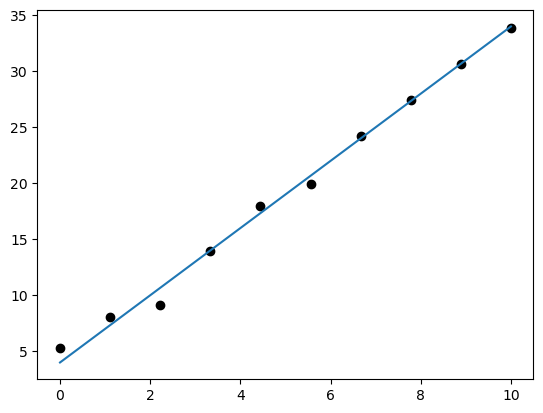

In [96]:
plt.plot(x,y)
plt.scatter(x,y_noise,color='black')

In [97]:
for i in range(0,MC-1):
    pm[i] = np.random.normal()
    pc[i] = np.random.normal()
    ptemp1[0]=pm[i]
    xtemp1[0]=m[i]
    ptemp2[0]=pc[i]
    xtemp2[0]=c[i]
    for j in range(0,LP-1):
        # Leapfrog to calculate the next sample in the chain for m
        k = pe1(xtemp1[j],c[i],x,y_noise,points)
        temp = ptemp1[j]-epsi*k/2                        
        xtemp1[j+1] = xtemp1[j]+epsi*ke(temp)            
        ptemp1[j+1] = temp-(epsi*pe1(xtemp1[j+1],c[i],x,y_noise,points)/2)
        
        # Leapfrog to calculate the next sample in the chain for c
        k1=pe2(m[i],xtemp2[j],x,y_noise,points)
        temp1 = ptemp2[j]-epsi*k1/2                        
        xtemp2[j+1] = xtemp2[j]+epsi*ke(temp1)            
        ptemp2[j+1] = temp1-(epsi*pe2(m[i],xtemp2[j+1],x,y_noise,points)/2)
        
# The Acceptance step       
    n1 = hamil(xtemp1[LP-1],xtemp2[LP-1],x,y_noise,ptemp1[LP-1],ptemp2[LP-1],points)    
    n2 = hamil(m[i],c[i],x,y_noise,pm[i],pc[i],points) 
    ratio = n1/n2   
    alpha = np.random.uniform()
    if alpha<min(1,ratio):   
        m[i+1]=xtemp1[LP-1]
        c[i+1] = xtemp2[LP-1]
        kount = kount + 1
    else:
        m[i+1]=m[i]
        c[i+1]=c[i]
print('Ratio of samples accepted to the total number of samples') 
print(kount/v)


C:\Users\Vaishali\AppData\Local\Temp\ipykernel_9616\769770858.py:24: RuntimeWarning: invalid value encountered in double_scalars
  ratio = n1/n2


Ratio of samples accepted to the total number of samples
9.618


In [82]:
burnin = 2500
#m,c = m[burnin:],c[burnin:]

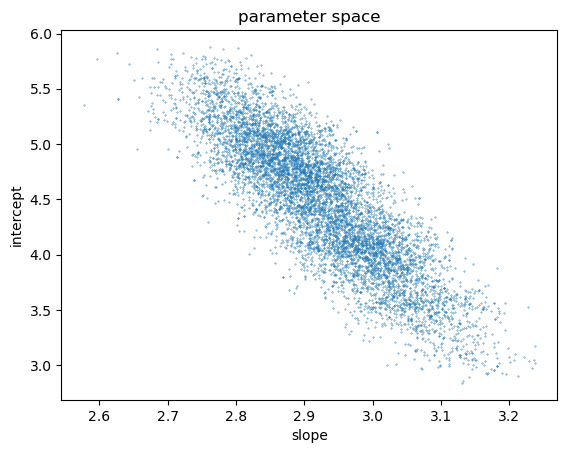

In [122]:
#Parameter space

plt.scatter(m[burnin:],c[burnin:],s=0.1)
plt.axhline(y=4,xmin=2,xmax=3.0)
plt.axvline(x=3,ymin=1,ymax=4.0)
plt.title('parameter space')
plt.xlabel('slope')
plt.ylabel('intercept')
plt.show()


In [83]:
#Plotting the distributions of m and c

In [87]:
mean_m=np.mean(m)
mean_c=np.mean(c)
std_m=np.std(m)
std_c=np.std(c)
act_m=3
act_c=4
print(mean_m)
print(std_m)
print(mean_c)
print(std_c)

2.9431423750833052
0.09942288450922669
4.33732566438877
0.5816087627314336


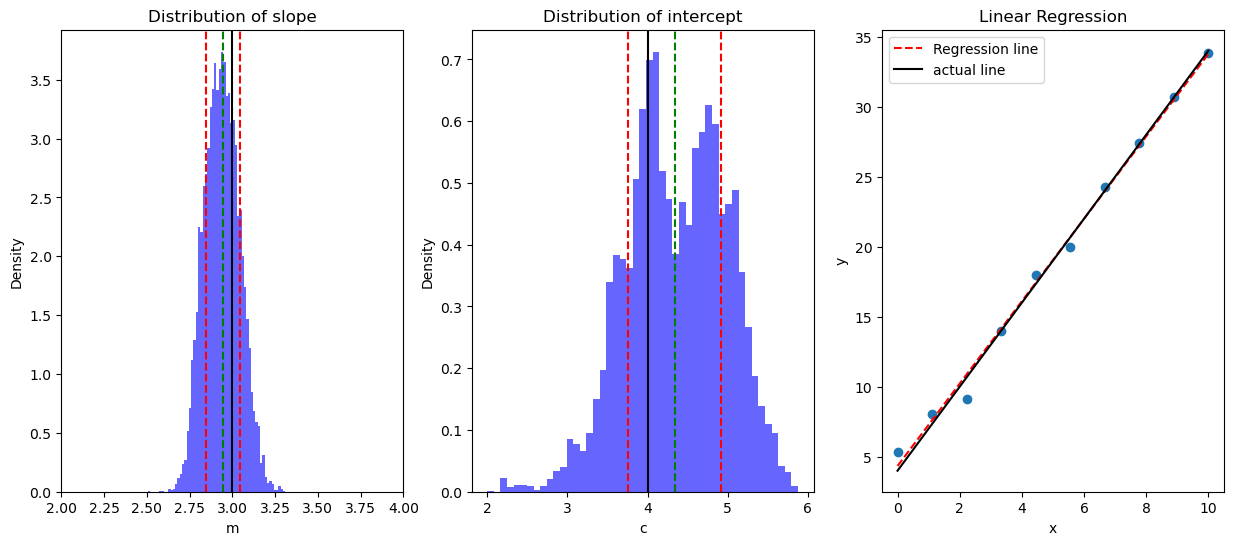

In [110]:
#Distribution of m
plt.figure(figsize=(15, 6))
plt.subplot(1,3,1)
plt.hist(m,bins='auto',density=True,alpha=0.6,color='blue')
plt.axvline(mean_m,color='green',linestyle='dashed')
plt.axvline(act_m,color='black')
plt.axvline(mean_m+std_m,color='red',linestyle='dashed')
plt.axvline(mean_m-std_m,color='red',linestyle='dashed')
plt.xlim(2,4)
plt.title('Distribution of slope')
plt.xlabel('m')
plt.ylabel('Density')

#Distribution of c
plt.subplot(1,3,2)
plt.hist(c,bins='auto',density=True,alpha=0.6,color='blue')
plt.axvline(mean_c,color='green',linestyle='dashed')
plt.axvline(act_c,color='black')
plt.axvline(mean_c+std_c,color='red',linestyle='dashed')
plt.axvline(mean_c-std_c,color='red',linestyle='dashed')
plt.title('Distribution of intercept')
plt.xlabel('c')
plt.ylabel('Density')

#Linear Regression
plt.subplot(1,3,3)
plt.plot(x,mean_m*x+mean_c,color='red',linestyle='dashed',label='Regression line')
plt.scatter(x,y_noise)
plt.plot(x,y,color='black',label='actual line')
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()



Text(0, 0.5, 'slope')

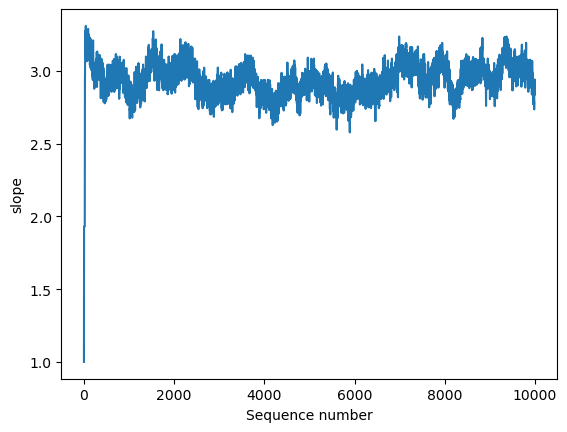

In [111]:
#Acceptance probability
plt.plot(m)
plt.xlabel('Sequence number')
plt.ylabel('slope')